# Python的安装
由于我们会使用到一些Python的非标准库，比如NumPy, SciPy, Matplotlib等，在Windows系统上安装这些包比较繁琐，所以推荐直接安装Anaconda使用，下载地址：https://www.continuum.io/downloads 。对于Mac用户，可以安装Anaconda，也可以自行安装Python并使用pip安装所需要的包。Linux用户可以安装Anaconda，也可以使用apt-get, rpm等安装所需的包。
此外，需要注意的是，Python有两个版本，Python2.7.x以及Python3.x，两者语法有差别。在这里我们总是使用Python3.x，所以在安装Python, Anaconda时，需要注意安装的版本号应该大于3，推荐使用最新的版本。
最后，尽管可以使用其他的编辑器比如Atom, sublime以及Spyder, PyCharm等，为了提交作业方便，我们仍然推荐使用Jupyter作为学习工具。比如此文档就是使用Jupyter写作。
# 使用Python生成随机数
在Python中，可以使用标准库中的random包生成随机数。最基本的是生成一个在$(0,1)$区间内的均匀分布的随机数，使用此均匀分布随机数，给定任意的分布函数$F$，可以生成服从$F$的随机数。

In [1]:
## 导入random包
import random as rd

## 生成一个x~Uniform(0,1)
x=rd.random()
print("一个(0,1)区间内的随机数：",x)

## 生成20个z~Uniform(0,1)
z=[rd.random() for i in range(20)]
print("20个(0,1)区间内的随机数：")
print(z)

一个(0,1)区间内的随机数： 0.4239187977882918
20个(0,1)区间内的随机数：
[0.7461777058671987, 0.7640002809369442, 0.2619349174270259, 0.5373151645694403, 0.021151977199459382, 0.15821115275152264, 0.19256790471421026, 0.17264567859434854, 0.6220504286628228, 0.7923766692008438, 0.22777164246391646, 0.8414320298347094, 0.43925557005139093, 0.9181651423121377, 0.8536656574811755, 0.47314245833637214, 0.2490876653434394, 0.5592904880494572, 0.7125196323734497, 0.9785660460497733]


如果我们需要生成一个服从分布函数$F: R\rightarrow [0,1]$的随机数，那么只要首先生成一个$(0,1)$的随机数$u$，并令$x=F^{-1}(u)$，那么新生成的$x$即服从$F$的分布。比如，指数分布的分布函数为$1-e^{-\frac{1}{b}\cdot x}$，其中b为一个参数，因而我们可以使用$x=-b\cdot \ln(u)$来生成服从指数分布的随机数。

In [2]:
## 导入random包
import random as rd
import math

## 设定参数

b=3

## 生成20个x~F(x)=1-exp{-(1/b)*x}
x=[-1*math.log(rd.random())*b for i in range(20)]
print("20个服从指数分布F(x)=1-exp{-(1/b)*x}的随机数：")
print(x)


20个服从指数分布F(x)=1-exp{-(1/b)*x}的随机数：
[0.44679805300951514, 5.611418627105818, 6.613927262639526, 5.733704664970527, 2.9236386321867047, 12.17669318889409, 3.5511002246962473, 3.5621849369890777, 2.5416062590494644, 0.871879888262096, 0.5616608891162714, 1.1193205247017282, 1.7287374220439435, 2.3134820314088587, 4.578108160809033, 1.092674172501304, 1.0272573762185706, 10.03015407424566, 1.9415010429259736, 9.05345307142383]


我们可以使用经验分布函数（Empirical distribution function）与理论的分布函数比较，来判断我们生成的随机数是否满足某一分布。经验分布函数的定义为：$\hat{F}(x)=\frac{1}{N}\cdot \sum_{i=1}^N 1\{X_i \leq x\}$，也就是给定一个$x$，其经验分布函数的值为样本中小于等于$x$的比例，比如：

In [3]:
## 导入random包
import random as rd
import math

## 设定参数

b=3 #指数分布参数
N=200 #样本容量

## 生成N个x~F(x)=1-exp{-(1/b)*x}
X=[-b*math.log(rd.random()) for i in range(N)]

## 给定一些点，在这些点上计算分布函数和经验分布函数
x=[(2*i+1)/10 for i in range(50)] #0.1,0.3,...,9.9

## 计算理论的分布函数
F=[1-math.exp(-1/b*t) for t in x]

## 计算经验分布函数

empirical_F=lambda s: math.fsum([z<=s for z in X])/N # lambda表达式，定义了s点处的经验分布函数
F_hat=list(map(empirical_F,x)) # 计算x的所有点的经验分布函数

## 计算经验分布函数与真实的分布函数之间的绝对差异
bias=[abs(F[i]-F_hat[i]) for i in range(50)]
## 打印两个分布函数及其绝对差异，以及平均的绝对差异
print(" x  | 分布函数 | 经验分布函数| 差的绝对值")
for i in range(50):
    print("%.1f |%.5f | %.5f  | %.5f" % (x[i],F[i],F_hat[i],bias[i]))
print("Mean absolute bias:",math.fsum(bias)/50)

 x  | 分布函数 | 经验分布函数| 差的绝对值
0.1 |0.03278 | 0.02500  | 0.00778
0.3 |0.09516 | 0.05000  | 0.04516
0.5 |0.15352 | 0.15500  | 0.00148
0.7 |0.20811 | 0.19000  | 0.01811
0.9 |0.25918 | 0.25000  | 0.00918
1.1 |0.30696 | 0.26000  | 0.04696
1.3 |0.35166 | 0.32500  | 0.02666
1.5 |0.39347 | 0.35500  | 0.03847
1.7 |0.43259 | 0.40000  | 0.03259
1.9 |0.46918 | 0.46000  | 0.00918
2.1 |0.50341 | 0.49500  | 0.00841
2.3 |0.53544 | 0.55000  | 0.01456
2.5 |0.56540 | 0.56500  | 0.00040
2.7 |0.59343 | 0.59000  | 0.00343
2.9 |0.61965 | 0.61500  | 0.00465
3.1 |0.64418 | 0.62500  | 0.01918
3.3 |0.66713 | 0.65000  | 0.01713
3.5 |0.68860 | 0.66500  | 0.02360
3.7 |0.70868 | 0.67500  | 0.03368
3.9 |0.72747 | 0.70500  | 0.02247
4.1 |0.74504 | 0.73000  | 0.01504
4.3 |0.76149 | 0.74500  | 0.01649
4.5 |0.77687 | 0.75000  | 0.02687
4.7 |0.79126 | 0.76500  | 0.02626
4.9 |0.80472 | 0.78000  | 0.02472
5.1 |0.81732 | 0.80000  | 0.01732
5.3 |0.82910 | 0.81000  | 0.01910
5.5 |0.84012 | 0.82500  | 0.01512
5.7 |0.85043 | 0.8300

# 使用NumPy
虽然Python自带了一些基本的数学函数以及列表、元组等数据结构，然而并没有对向量运算的天然支持，因而我们需要NumPy这个包来支持Python中的向量运算。https://docs.scipy.org/doc/numpy-dev/user/quickstart.html 提供了一个简单的教程。
下面展示了如何使用NumPy操作向量：

In [4]:
import numpy as np

a=np.array([1,2,3]) #创建一个三维向量
print('向量a=',a)

b=np.ones(3) #创建一个元素全为1的向量
print('b=',b)
print("基本数学运算：元素对元素运算")
print('数乘：3*a=',3*a)
print('a-b=',a-b)
print('a+b=',a+b)
print('a*b=',a*b)
print('b/a=',b/a)
print('向量运算')
c=np.dot(a,b) #a.*b
print('点乘a.*b=',c)
d=np.outer(a,b)
print('外积(a,b)=\n',d)

## linespace
lp=np.linspace(0,5,20) #0到5等分20等分
print("0到5等分20等分：\n",lp)

向量a= [1 2 3]
b= [ 1.  1.  1.]
基本数学运算：元素对元素运算
数乘：3*a= [3 6 9]
a-b= [ 0.  1.  2.]
a+b= [ 2.  3.  4.]
a*b= [ 1.  2.  3.]
b/a= [ 1.          0.5         0.33333333]
向量运算
点乘a.*b= 6.0
外积(a,b)=
 [[ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 3.  3.  3.]]
0到5等分20等分：
 [ 0.          0.26315789  0.52631579  0.78947368  1.05263158  1.31578947
  1.57894737  1.84210526  2.10526316  2.36842105  2.63157895  2.89473684
  3.15789474  3.42105263  3.68421053  3.94736842  4.21052632  4.47368421
  4.73684211  5.        ]


下面展示如何使用NumPy操作矩阵：

In [5]:
## 矩阵
A=np.array([[1,2,3],[4,8,6],[4,3,2]])
print("矩阵A=\n",A)
M=np.zeros((3,3)) #全为0的矩阵
print("矩阵M=\n",M)
O=np.ones((3,3)) #全为1的矩阵
print("矩阵O=\n",O)
I=np.eye(3) #单位阵
print("矩阵I=\n",I)
print("A+I=\n",A+I)
print("A-I=\n",A-I)
print("A*I=\n",A*I)
print("I/A=\n",I/A)
print("矩阵相乘，A*O=\n", np.dot(A,O))
print("矩阵相乘，O*A=\n", np.dot(O,A))
print("矩阵转置，tranpose(A)=\n", A.transpose())
print("矩阵的逆，inv(A)=\n", np.linalg.inv(A))
l,L=np.linalg.eig(A)
print("矩阵的特征值=\n", l)
print("矩阵的特征向量=\n", L)

矩阵A=
 [[1 2 3]
 [4 8 6]
 [4 3 2]]
矩阵M=
 [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
矩阵O=
 [[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
矩阵I=
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
A+I=
 [[ 2.  2.  3.]
 [ 4.  9.  6.]
 [ 4.  3.  3.]]
A-I=
 [[ 0.  2.  3.]
 [ 4.  7.  6.]
 [ 4.  3.  1.]]
A*I=
 [[ 1.  0.  0.]
 [ 0.  8.  0.]
 [ 0.  0.  2.]]
I/A=
 [[ 1.     0.     0.   ]
 [ 0.     0.125  0.   ]
 [ 0.     0.     0.5  ]]
矩阵相乘，A*O=
 [[  6.   6.   6.]
 [ 18.  18.  18.]
 [  9.   9.   9.]]
矩阵相乘，O*A=
 [[  9.  13.  11.]
 [  9.  13.  11.]
 [  9.  13.  11.]]
矩阵转置，tranpose(A)=
 [[1 4 4]
 [2 8 3]
 [3 6 2]]
矩阵的逆，inv(A)=
 [[ 0.06666667 -0.16666667  0.4       ]
 [-0.53333333  0.33333333 -0.2       ]
 [ 0.66666667 -0.16666667  0.        ]]
矩阵的特征值=
 [ 11.80142315  -2.04468118   1.24325803]
矩阵的特征向量=
 [[ 0.26952559  0.61195333  0.44683972]
 [ 0.88453378  0.21152352 -0.72721843]
 [ 0.3807308  -0.76208328  0.52104474]]


此外，NumPy还支持很多常用函数的向量运算，比如：

In [6]:
a=np.array([1,0.5,3])
print('a=',a)
print('cos(a)=',np.cos(a))
print('exp(a)=',np.exp(a))
print('ln(a)=',np.log(a))

a= [ 1.   0.5  3. ]
cos(a)= [ 0.54030231  0.87758256 -0.9899925 ]
exp(a)= [  2.71828183   1.64872127  20.08553692]
ln(a)= [ 0.         -0.69314718  1.09861229]


最后，NumPy中的random模块也可以用来生成随机数：

In [7]:
import numpy.random as nprd

# 产生(0,1)的随机数
a=nprd.rand()
print('a=',a)

# 产生20个(0,1)的随机数
x=nprd.rand(20)
print('x=\n',x)

a= 0.9439981462339899
x=
 [ 0.73295621  0.02100395  0.87554092  0.22174679  0.75227554  0.32194272
  0.51274438  0.73570712  0.33611003  0.91666306  0.09490157  0.37551636
  0.69430588  0.13945022  0.37854763  0.87019048  0.24890196  0.46031048
  0.52154089  0.19364191]


使用NumPy，上面的指数分布的例子可以改写成如下更加简洁的方式：

In [8]:
import numpy as np
import numpy.random as nprd

## 设定参数

b=3 #指数分布参数
N=200 #样本容量

## 生成N个x~F(x)=1-exp{-(1/b)*x}
X=-b*np.log(nprd.random(N))

## 给定一些点，在这些点上计算分布函数和经验分布函数
x=np.linspace(0.1,9.9,50) #0.1,0.3,...,9.9

## 计算理论的分布函数
F=1-np.exp((-1/b)*x)

## 计算经验分布函数

empirical_F=lambda s: np.sum(X<=s)/N # lambda表达式，定义了s点处的经验分布函数
F_hat=np.array(list(map(empirical_F,x))) # 计算x的所有点的经验分布函数

## 计算经验分布函数与真实的分布函数之间的绝对差异
bias=np.abs(F-F_hat)
## 打印两个分布函数及其绝对差异，以及平均的绝对差异
print(" x  | 分布函数| 经验分布函数| 差的绝对值")
for i in range(50):
    print("%.1f |%.5f | %.5f  | %.5f" % (x[i],F[i],F_hat[i],bias[i]))
print("Mean absolute bias:",np.sum(bias)/50)

 x  | 分布函数| 经验分布函数| 差的绝对值
0.1 |0.03278 | 0.01500  | 0.01778
0.3 |0.09516 | 0.04500  | 0.05016
0.5 |0.15352 | 0.11000  | 0.04352
0.7 |0.20811 | 0.17500  | 0.03311
0.9 |0.25918 | 0.23500  | 0.02418
1.1 |0.30696 | 0.29000  | 0.01696
1.3 |0.35166 | 0.34000  | 0.01166
1.5 |0.39347 | 0.37000  | 0.02347
1.7 |0.43259 | 0.40000  | 0.03259
1.9 |0.46918 | 0.45500  | 0.01418
2.1 |0.50341 | 0.50000  | 0.00341
2.3 |0.53544 | 0.52000  | 0.01544
2.5 |0.56540 | 0.55500  | 0.01040
2.7 |0.59343 | 0.59000  | 0.00343
2.9 |0.61965 | 0.62500  | 0.00535
3.1 |0.64418 | 0.63500  | 0.00918
3.3 |0.66713 | 0.65000  | 0.01713
3.5 |0.68860 | 0.66500  | 0.02360
3.7 |0.70868 | 0.68000  | 0.02868
3.9 |0.72747 | 0.69500  | 0.03247
4.1 |0.74504 | 0.72000  | 0.02504
4.3 |0.76149 | 0.74000  | 0.02149
4.5 |0.77687 | 0.75500  | 0.02187
4.7 |0.79126 | 0.78500  | 0.00626
4.9 |0.80472 | 0.80000  | 0.00472
5.1 |0.81732 | 0.80500  | 0.01232
5.3 |0.82910 | 0.81500  | 0.01410
5.5 |0.84012 | 0.84000  | 0.00012
5.7 |0.85043 | 0.84500

# 使用matplotlib画图
在Python中，可以方便的是用matplotlib画图。在使用前应该使用(sudo) pip install matplotlib进行安装，Python3可能需要使用pip3 install。matplotlib地址：http://matplotlib.org/2.0.0/index.html ，教程地址：http://www.labri.fr/perso/nrougier/teaching/matplotlib/ 。
使用matplotlib可以地将以上计算得到的理论分布函数与经验分布函数表示在图中：

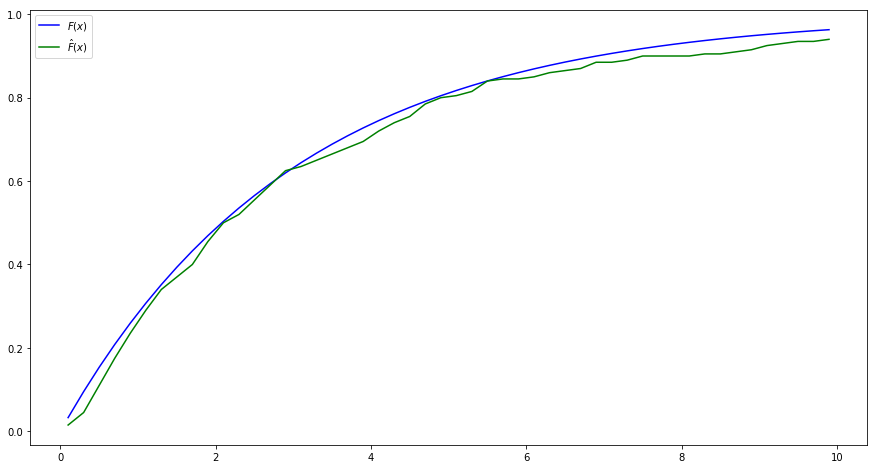

In [9]:
## 导入matplotlib
import matplotlib.pyplot as plt 
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)


plt.plot(x,F,label=r'$F(x)$',color='blue') ## 画出理论的分布函数
plt.plot(x,F_hat,label=r'$\hat{F}(x)$',color='green') ## 画出经验分布函数
plt.legend(loc='upper left', frameon=True)
plt.show() ## 画图

除此之外，matplotlib的图类型非常多，比如常见的直方图：

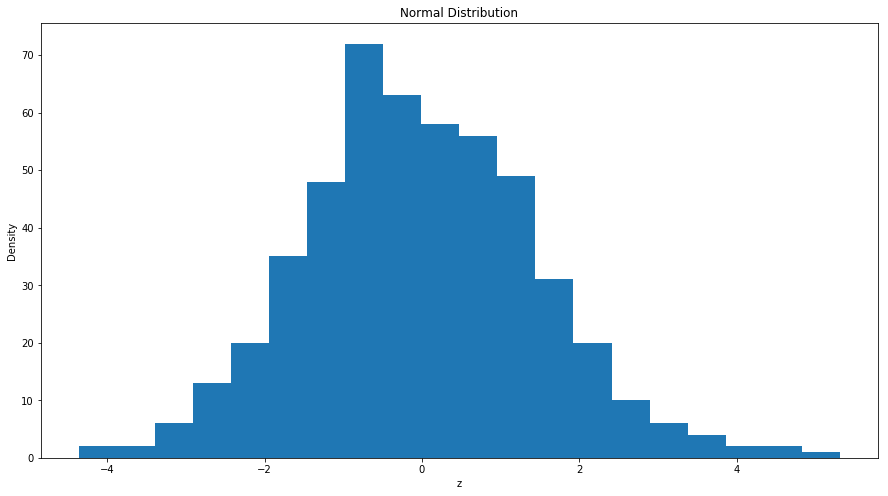

In [10]:
z=nprd.normal(0,np.sqrt(2),500) ## 生成100个均值为0，方差为2的正态分布
plt.hist(z,bins=20) ##柱状图，20个柱子
plt.xlabel('z')
plt.ylabel("Density")
plt.title('Normal Distribution')
plt.show() ## 画图

以及散点图：

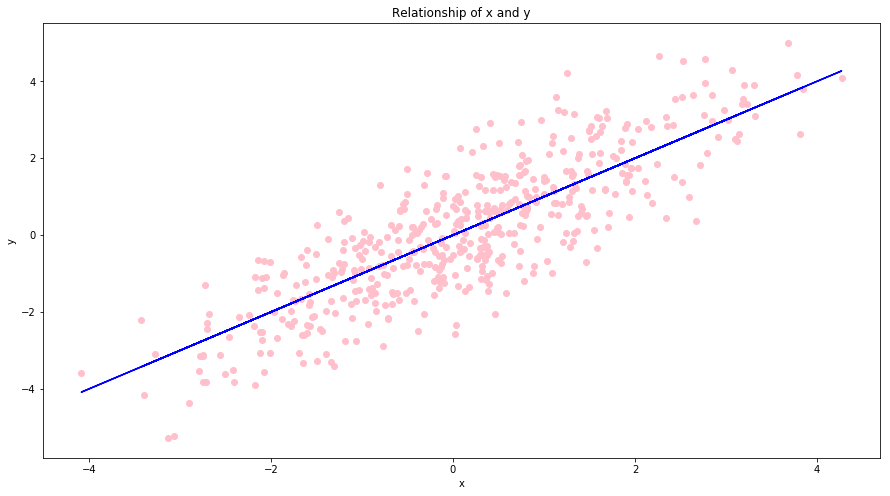

In [11]:
x=nprd.normal(0,np.sqrt(2),500) ## 生成100个均值为0，方差为2的正态分布
y=x+nprd.normal(0,1,500) ## y与x为线性关系
plt.scatter(x,y,color='pink') ##散点图
plt.plot(x,x,color='blue') ## 回归曲线
plt.xlabel('x')
plt.ylabel("y")
plt.title('Relationship of x and y')
plt.show() ## 画图

可以参考matplotlib的官方网站以及教程，组合使用这些图形可以画出各种符合自己要求的图像。